# Handle Missing Values

## --> By Drop Method
##### Use this method only when dataset contains missing values < 50% . Means data is un usefull when it is most null.
##### Drop only when the ratio of missing is very low

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv("cat_breeds_dirty.csv",sep=";")
df.head(3)

,Breed,Age_in_years,Age_in_months,Gender,Neutered_or_spayed,Body_length,Weight,Fur_colour_dominant,Fur_pattern,Eye_colour,Allowed_outdoor,Preferred_food,Owner_play_time_minutes,Sleep_time_hours,Country,Latitude,Longitude
0,Angora,0.25,3.0,female,False,19.0,2.0,white,solid,blue,FALSE,wet,46.0,16.0,France,43.296482,5.36978
1,Angora,0.33,4.0,male,False,19.0,2.5,white,solid,blue,FALSE,wet,48.0,16.0,France,43.611660,3.87771
2,Angora,0.50,NaN,NaN,False,20.0,2.8,what does it mean dominant?,solid,green,I never allow my kitty outside!!!!!,wet,41.0,11.0,France,44.837789,-0.57918


In [48]:
df.shape

(1103, 17)

In [49]:
(df.isnull().sum()/df.shape[0])*100

Breed                      10.154125
Age_in_years                2.810517
Age_in_months               3.354488
Gender                      6.074343
Neutered_or_spayed          4.805077
Body_length                 2.357208
Weight                      2.357208
Fur_colour_dominant         1.178604
Fur_pattern                 4.351768
Eye_colour                  3.535811
Allowed_outdoor             3.898459
Preferred_food              1.903898
Owner_play_time_minutes     1.903898
Sleep_time_hours            3.717135
Country                     6.799637
Latitude                    5.530372
Longitude                   5.530372
dtype: float64

In [50]:
(df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100

4.133112900645299

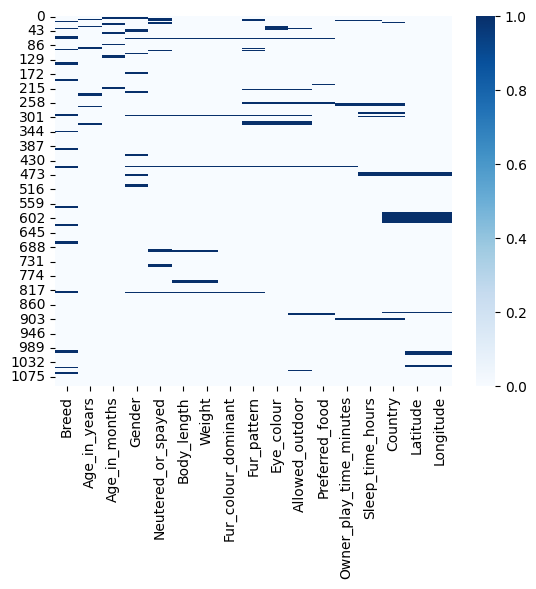

In [51]:
sns.heatmap(df.isnull(),cmap="Blues")
plt.show()

In [53]:
df.drop(columns=["Age_in_months"],inplace=True) # Use only when it columns have high % of null values
# Uncommnet by removing # in first to run if required.  
# I removed due to unuse of column in my dataset

In [ ]:
#df.dropna() # it remove all rows with null values it also not a good method if very less number of rows exists then use it
# inplace=True effects our dataframe which imported here in above otherwise it creates newdataset

,Breed,Age_in_years,Age_in_months,Gender,Neutered_or_spayed,Body_length,Weight,Fur_colour_dominant,Fur_pattern,Eye_colour,Allowed_outdoor,Preferred_food,Owner_play_time_minutes,Sleep_time_hours,Country,Latitude,Longitude
0,Angora,0.250000,3.0,female,False,19.0,2.0,white,solid,blue,FALSE,wet,46.0,16.0,France,43.296482,5.369780
1,Angora,0.330000,4.0,male,False,19.0,2.5,white,solid,blue,FALSE,wet,48.0,16.0,France,43.611660,3.877710
26,Angora,1.250000,15.0,female,True,26.0,3.4,white,solid,blue,FALSE,wet,25.0,15.0,France,43.296482,5.369780
27,Angora,5.330000,64.0,male,True,44.0,4.6,white,solid,blue,TRUE,wet,20.0,16.0,France,44.837789,-0.579180
52,Angora,2.250000,27.0,male,False,38.0,4.6,red/cream,tabby,blue,FALSE,wet,11.0,14.0,France,44.837789,-0.579180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,Angora,4.170000,50.0,female,True,35.0,2.8,white,solid,amber,TRUE,dry,28.0,14.0,USA,45.523450,-122.676210
1099,Angora,-4.250000,-51.0,male,True,37.0,4.6,white,solid,amber,FALSE,dry,36.0,14.0,France,45.763420,4.834277
1100,Angora,-4.333333,-52.0,female,True,34.0,4.3,white,solid,cute,FALSE,wet,37.0,16.0,USA,42.358430,-71.059770
1101,Angora,-4.333333,-52.0,female,True,35.0,3.8,black,solid,amber,FALSE,wet,30.0,14.0,USA,45.523450,-122.676210


In [27]:
((1103-748)/1103)*100

32.18495013599274

In [28]:
# You can see how much data we lost so don't use it everytime.

## --> By Imputing Categorical and  Numerical data
##### Mean,Median for Numerical and Mode for Categorical Data means object type
##### Backward Filling for filling on back null values
##### Forward Filling for filling forword null values

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Breed                    991 non-null    object 
 1   Age_in_years             1072 non-null   float64
 2   Gender                   1036 non-null   object 
 3   Neutered_or_spayed       1050 non-null   object 
 4   Body_length              1077 non-null   float64
 5   Weight                   1077 non-null   float64
 6   Fur_colour_dominant      1090 non-null   object 
 7   Fur_pattern              1055 non-null   object 
 8   Eye_colour               1064 non-null   object 
 9   Allowed_outdoor          1060 non-null   object 
 10  Preferred_food           1082 non-null   object 
 11  Owner_play_time_minutes  1082 non-null   float64
 12  Sleep_time_hours         1062 non-null   float64
 13  Country                  1028 non-null   object 
 14  Latitude                

In [55]:
# df.fillna(method="bfill")
# df.fillna(method="ffill",axis=1) # axis define rows and columns axis 0 default for rows and 1 for columns
# Use if you want

In [56]:
df["Gender"].mode()[0]

'male'

In [57]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)

/tmp/ipykernel_15844/1219453514.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)


In [58]:
df["Age_in_years"].fillna(df["Age_in_years"].mean(),inplace=True)

/tmp/ipykernel_15844/3978820723.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age_in_years"].fillna(df["Age_in_years"].mean(),inplace=True)


In [ ]:
# for i in df.select_dtypes(include="object").columns:
#     df[i].fillna(df[i].mode()[0])

/tmp/ipykernel_15844/1279636890.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i].fillna(df[i].mode()[0])


## --> By Scikit Learn
##### Mostly used when we create pipeline means when we make it real world and data comes through it.

In [61]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='most_frequent')

In [63]:
imputed = si.fit_transform(df.select_dtypes(include='object'))

In [65]:
imputed_df = pd.DataFrame(imputed, columns=df.select_dtypes(include='object').columns, index=df.index)

In [66]:
imputed_df.head()

,Breed,Gender,Neutered_or_spayed,Fur_colour_dominant,Fur_pattern,Eye_colour,Allowed_outdoor,Preferred_food,Country
0,Angora,female,False,white,solid,blue,FALSE,wet,France
1,Angora,male,False,white,solid,blue,FALSE,wet,France
2,Angora,male,False,what does it mean dominant?,solid,green,I never allow my kitty outside!!!!!,wet,France
3,Ankora,male,False,white,dirty,blue,FALSE,wet,France
4,Angora,male,True,red/cream,tabby,green,FALSE,wet,france


In [67]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Breed                1103 non-null   object
 1   Gender               1103 non-null   object
 2   Neutered_or_spayed   1103 non-null   object
 3   Fur_colour_dominant  1103 non-null   object
 4   Fur_pattern          1103 non-null   object
 5   Eye_colour           1103 non-null   object
 6   Allowed_outdoor      1103 non-null   object
 7   Preferred_food       1103 non-null   object
 8   Country              1103 non-null   object
dtypes: object(9)
memory usage: 77.7+ KB


In [69]:
# Select ONLY float64 columns
float_cols = df.select_dtypes(include='float64')

# Impute
si_float = SimpleImputer(strategy='mean')
imputed_float_data = si_float.fit_transform(float_cols)  # Fit on float columns only

# Reconstruct DataFrame
imputed_float_df = pd.DataFrame(
    imputed_float_data,
    columns=float_cols.columns,
    index=df.index
)

In [70]:
# Assuming you already have imputed categorical data (from earlier)
imputed_df = pd.concat([imputed_df, imputed_float_df], axis=1)

In [71]:
imputed_df.head()

,Breed,Gender,Neutered_or_spayed,Fur_colour_dominant,Fur_pattern,Eye_colour,Allowed_outdoor,Preferred_food,Country,Age_in_years,Body_length,Weight,Owner_play_time_minutes,Sleep_time_hours,Latitude,Longitude
0,Angora,female,False,white,solid,blue,FALSE,wet,France,0.25,19.0,2.0,46.0,16.0,43.296482,5.369780
1,Angora,male,False,white,solid,blue,FALSE,wet,France,0.33,19.0,2.5,48.0,16.0,43.611660,3.877710
2,Angora,male,False,what does it mean dominant?,solid,green,I never allow my kitty outside!!!!!,wet,France,0.50,20.0,2.8,41.0,11.0,44.837789,-0.579180
3,Ankora,male,False,white,dirty,blue,FALSE,wet,France,0.50,21.0,3.0,24.0,8.0,43.611660,3.877710
4,Angora,male,True,red/cream,tabby,green,FALSE,wet,france,0.50,21.0,3.0,51.0,10.0,48.864716,2.349014


In [72]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Breed                    1103 non-null   object 
 1   Gender                   1103 non-null   object 
 2   Neutered_or_spayed       1103 non-null   object 
 3   Fur_colour_dominant      1103 non-null   object 
 4   Fur_pattern              1103 non-null   object 
 5   Eye_colour               1103 non-null   object 
 6   Allowed_outdoor          1103 non-null   object 
 7   Preferred_food           1103 non-null   object 
 8   Country                  1103 non-null   object 
 9   Age_in_years             1103 non-null   float64
 10  Body_length              1103 non-null   float64
 11  Weight                   1103 non-null   float64
 12  Owner_play_time_minutes  1103 non-null   float64
 13  Sleep_time_hours         1103 non-null   float64
 14  Latitude                

In [73]:
# Now our Dataset is cleaned

In [75]:
imputed_df.to_csv("my_cleaned.csv")